# Table of Contents
1)Problem Statement

2)Data Description

3)Exploratory Data Analysis

4)Data Pre-Processing

5)Modelling

6)Evaluation

7)Model Insights

# 1)Problem Statement
The Data set is related to Financial domain, The main aim of the project is to develop a classification model that predicts whether a customer is likely to default the loan.

# 2)Data Description
Data contains 2 sets for data for rejected and accepted loans, from the Lending club, between 2007 to 2018 Quarter 4.
We will look at the accepted loans and only a subset of the columns.

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import PowerTransformer,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,roc_auc_score,classification_report
from mlxtend.feature_selection import sequential_feature_selector
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from statsmodels.api import Logit,add_constant
import scipy.stats as stats

# Read Data and review

In [2]:
df=pd.read_csv('accepted_2007_to_2018Q4.csv')
data=pd.read_csv('accepted_2007_to_2018Q4.csv')
df

C:\Users\Prajwal Raj R\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


id  member_id  \
0                                                68407277        NaN   
1                                                68355089        NaN   
2                                                68341763        NaN   
3                                                66310712        NaN   
4                                                68476807        NaN   
...                                                   ...        ...   
2260696                                          88985880        NaN   
2260697                                          88224441        NaN   
2260698                                          88215728        NaN   
2260699  Total amount funded in policy code 1: 1465324575        NaN   
2260700   Total amount funded in policy code 2: 521953170        NaN   

         loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
0           3600.0       3600.0           3600.0   36 months     13.99   
1          24700.0      24700.0          24700.0   36 months     11.99   
2          20000.0      20000.0          20000.0   60 months     10.78   
3          35000.0      35000.0          35000.0   60 months     14.85   
4          10400.0      10400.0          10400.0   60 months     22.45   
...            ...          ...              ...         ...       ...   
2260696    40000.0      40000.0          40000.0   60 months     10.49   
2260697    24000.0      24000.0          24000.0   60 months     14.49   
2260698    14000.0      14000.0          14000.0   60 months     14.49   
2260699        NaN          NaN              NaN         NaN       NaN   
2260700        NaN          NaN              NaN         NaN       NaN   

         installment grade sub_grade  ... hardship_payoff_balance_amount  \
0             123.03     C        C4  ...                            NaN   
1             820.28     C        C1  ...                            NaN   
2             432.66     B        B4  ...                            NaN   
3             829.90     C        C5  ...                            NaN   
4             289.91     F        F1  ...                            NaN   
...              ...   ...       ...  ...                            ...   
2260696       859.56     B        B3  ...                            NaN   
2260697       564.56     C        C4  ...                            NaN   
2260698       329.33     C        C4  ...                            NaN   
2260699          NaN   NaN       NaN  ...                            NaN   
2260700          NaN   NaN       NaN  ...                            NaN   

        hardship_last_payment_amount disbursement_method  \
0                                NaN                Cash   
1                                NaN                Cash   
2                                NaN                Cash   
3                                NaN                Cash   
4                                NaN                Cash   
...                              ...                 ...   
2260696                          NaN                Cash   
2260697                          NaN                Cash   
2260698                          NaN                Cash   
2260699                          NaN                 NaN   
2260700                          NaN                 NaN   

         debt_settlement_flag debt_settlement_flag_date settlement_status  \
0                           N                       NaN               NaN   
1                           N                       NaN               NaN   
2                           N                       NaN               NaN   
3                           N                       NaN               NaN   
4                           N                       NaN               NaN   
...                       ...                       ...               ...   
2260696                     N                       NaN               NaN   
2260697                     Y                  Mar-

In [3]:
df.dtypes

id                        object
member_id                float64
loan_amnt                float64
funded_amnt              float64
funded_amnt_inv          float64
                          ...   
settlement_status         object
settlement_date           object
settlement_amount        float64
settlement_percentage    float64
settlement_term          float64
Length: 151, dtype: object

In [4]:
df.drop('grade',axis=1,inplace=True)

Reason for dropping grade column is 'grade and subgrade columns posess multicollinearity since subgrade is further classification 
grade'.

Checking for the percentage of null values  in each column.

In [5]:
dn=pd.DataFrame((df.isna().sum()/df.shape[0])*100)
dn.reset_index()

index          0
0                       id    0.00000
1                member_id  100.00000
2                loan_amnt    0.00146
3              funded_amnt    0.00146
4          funded_amnt_inv    0.00146
..                     ...        ...
145      settlement_status   98.48516
146        settlement_date   98.48516
147      settlement_amount   98.48516
148  settlement_percentage   98.48516
149        settlement_term   98.48516

[150 rows x 2 columns]

Dropping the columns which consists 15% of null values.

In [6]:
null=[]
for x,y in zip(dn[0],dn.index):
      if x>15:
        null.append(y)
df.drop(null,axis=1,inplace=True)

In [7]:
df.drop('term',axis=1,inplace=True)

Dropping term column because it posess multicollinearity with installment and loan_amnt.

In [8]:
df.drop('disbursement_method',axis=1,inplace=True)

'disbursement_method' is dropped because of obvious reason that it doesnt help the model to capture any variance because the possibility that the loan will be defaulted is same for all the classes in disbursement method.

Dropping insignificant variables by checking their standard devaition. 

In [9]:
insig=[]
for x in df.std().items():
    if x[1]<50:
        insig.append(x[0])


In [10]:
df.drop(insig,axis=1,inplace=True)

In [11]:
df.drop('id',axis=1,inplace=True)

Dropping 'id' column because of no variance present in the column with respect to target.

Dropping below columns for obvious reason.

In [12]:
df.drop(['url','issue_d','pymnt_plan','purpose','title','addr_state'],axis=1,inplace=True)

In [13]:
df.drop(['earliest_cr_line','zip_code','out_prncp','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type','mo_sin_old_rev_tl_op','hardship_flag','funded_amnt'],axis=1,inplace=True)

In [14]:
df.drop('debt_settlement_flag',axis=1,inplace=True)

Deleting null values across rows.

In [15]:
df.dropna(inplace=True,how='any')

In [16]:
df.set_index('loan_status',inplace=True)

In [17]:
df.drop(['Current','In Grace Period','Late (16-30 days)'],axis=0,inplace=True)

Dropping current,grace period and Late (16-30 days) due to lack of evidence that they have defaulted the loan.

In [18]:
df.reset_index(inplace=True)

Converting target from multiclass to binary.

In [19]:
df['default']=df['loan_status'].apply(lambda x: 1 if x in ['Charged Off','Late (31-120)'] else 0)

Charged off and Late(31-120) days are considered as default.

# 3)Exploratory Data Analysis

Correlation heatmap.

<Figure size 1.08e+06x72000 with 0 Axes>

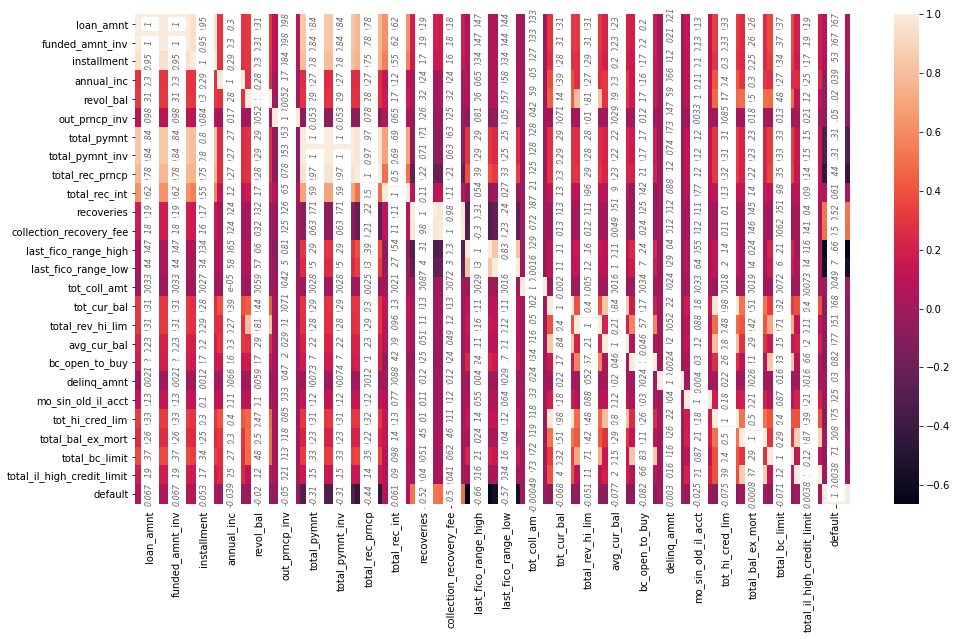

In [20]:
plt.figure(figsize=[15000,1000])
# annot_kws parameter
plt.figure(figsize=(16,9))
annot_kws={'fontsize':8, 
           'fontstyle':'italic',  
           'color':"k",
           'alpha':0.6, 
           'rotation':"vertical",
           'verticalalignment':'center',
           'backgroundcolor':'w'}
 
sns.heatmap(df.corr(), annot = True, annot_kws= annot_kws)
plt.show()

Checking for outliers.

C:\Users\Prajwal Raj R\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


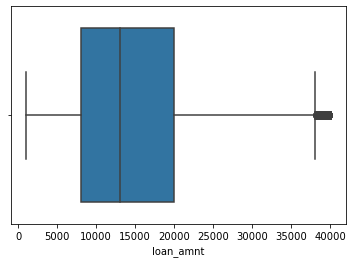

C:\Users\Prajwal Raj R\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


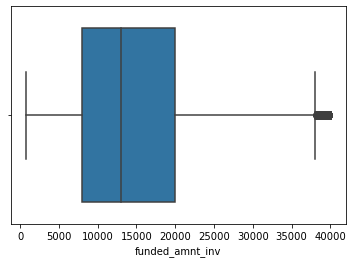

C:\Users\Prajwal Raj R\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


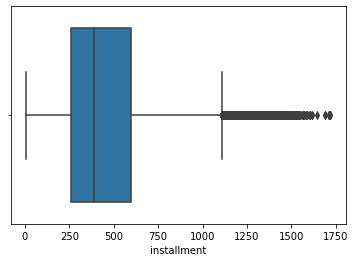

C:\Users\Prajwal Raj R\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


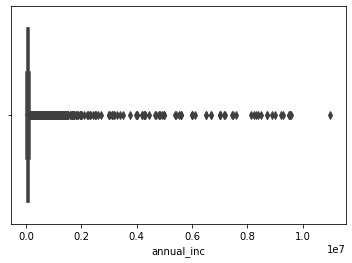

C:\Users\Prajwal Raj R\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


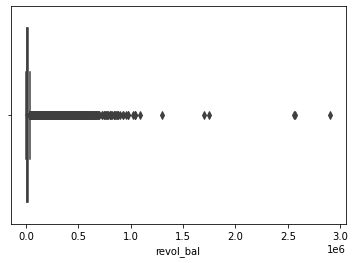

C:\Users\Prajwal Raj R\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


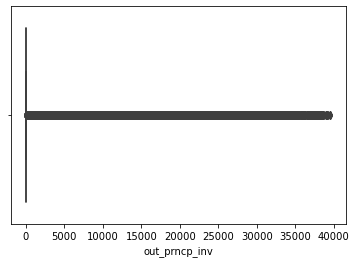

C:\Users\Prajwal Raj R\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


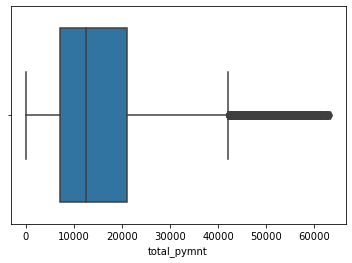

C:\Users\Prajwal Raj R\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


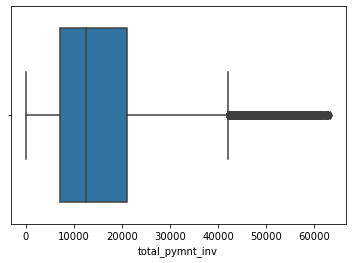

C:\Users\Prajwal Raj R\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


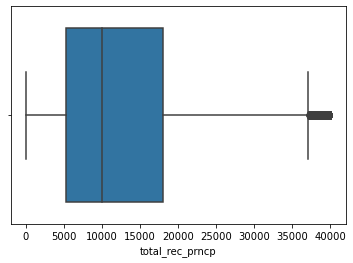

C:\Users\Prajwal Raj R\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


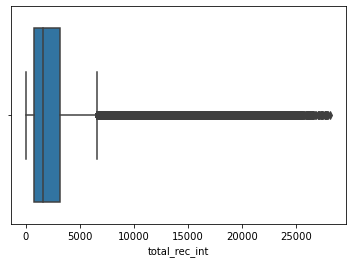

C:\Users\Prajwal Raj R\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


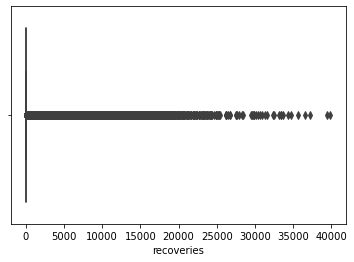

C:\Users\Prajwal Raj R\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


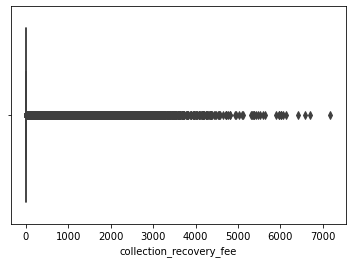

C:\Users\Prajwal Raj R\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


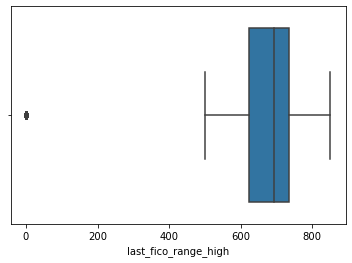

C:\Users\Prajwal Raj R\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


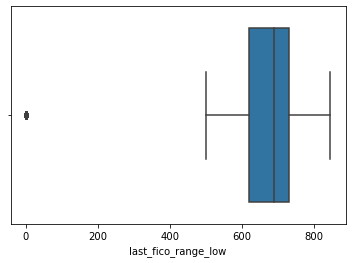

C:\Users\Prajwal Raj R\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


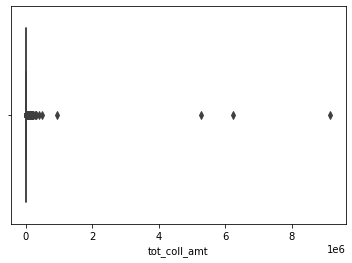

C:\Users\Prajwal Raj R\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


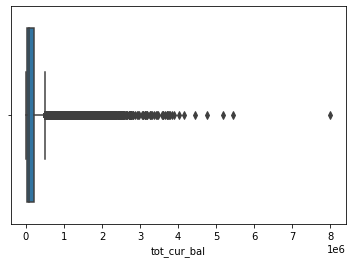

C:\Users\Prajwal Raj R\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


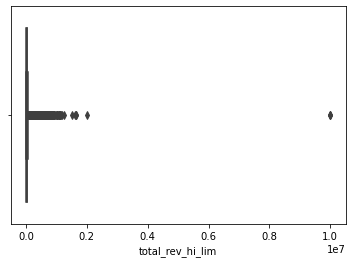

C:\Users\Prajwal Raj R\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


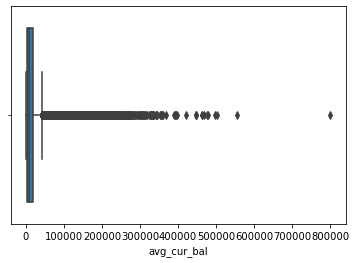

C:\Users\Prajwal Raj R\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


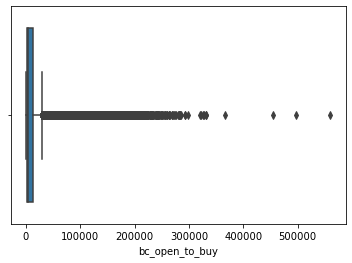

C:\Users\Prajwal Raj R\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


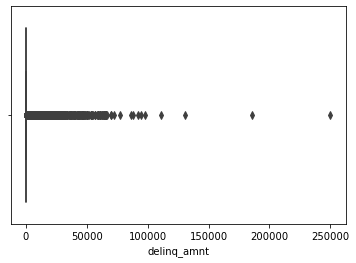

C:\Users\Prajwal Raj R\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


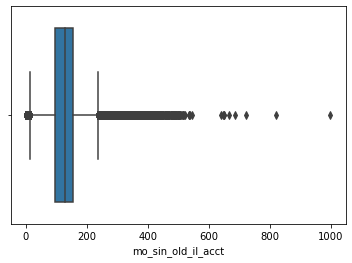

C:\Users\Prajwal Raj R\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


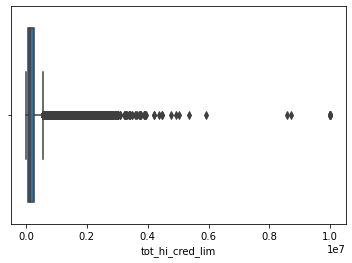

C:\Users\Prajwal Raj R\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


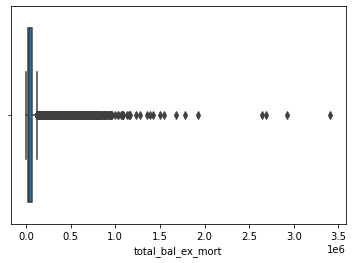

C:\Users\Prajwal Raj R\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


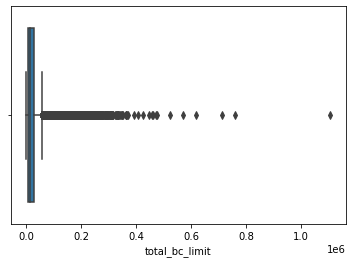

C:\Users\Prajwal Raj R\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


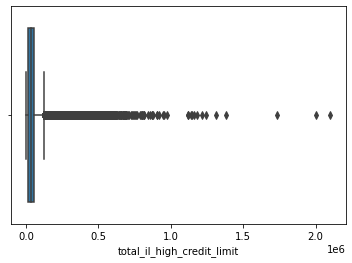

C:\Users\Prajwal Raj R\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


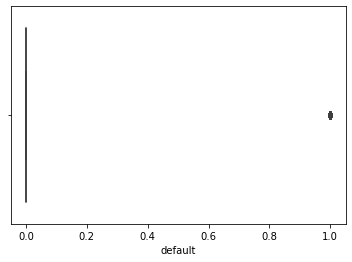

In [21]:
for x in df.select_dtypes(np.number).columns:
    sns.boxplot(df[x])
    plt.show()

Inference-->A lot of outliers are present in every column so outlier treatment is necessary for better results.

In [22]:
df.drop('loan_amnt',axis=1,inplace=True)

Droppinng loan_amnt column because it seems to have high multicollinearity with funded_amnt and installment column.

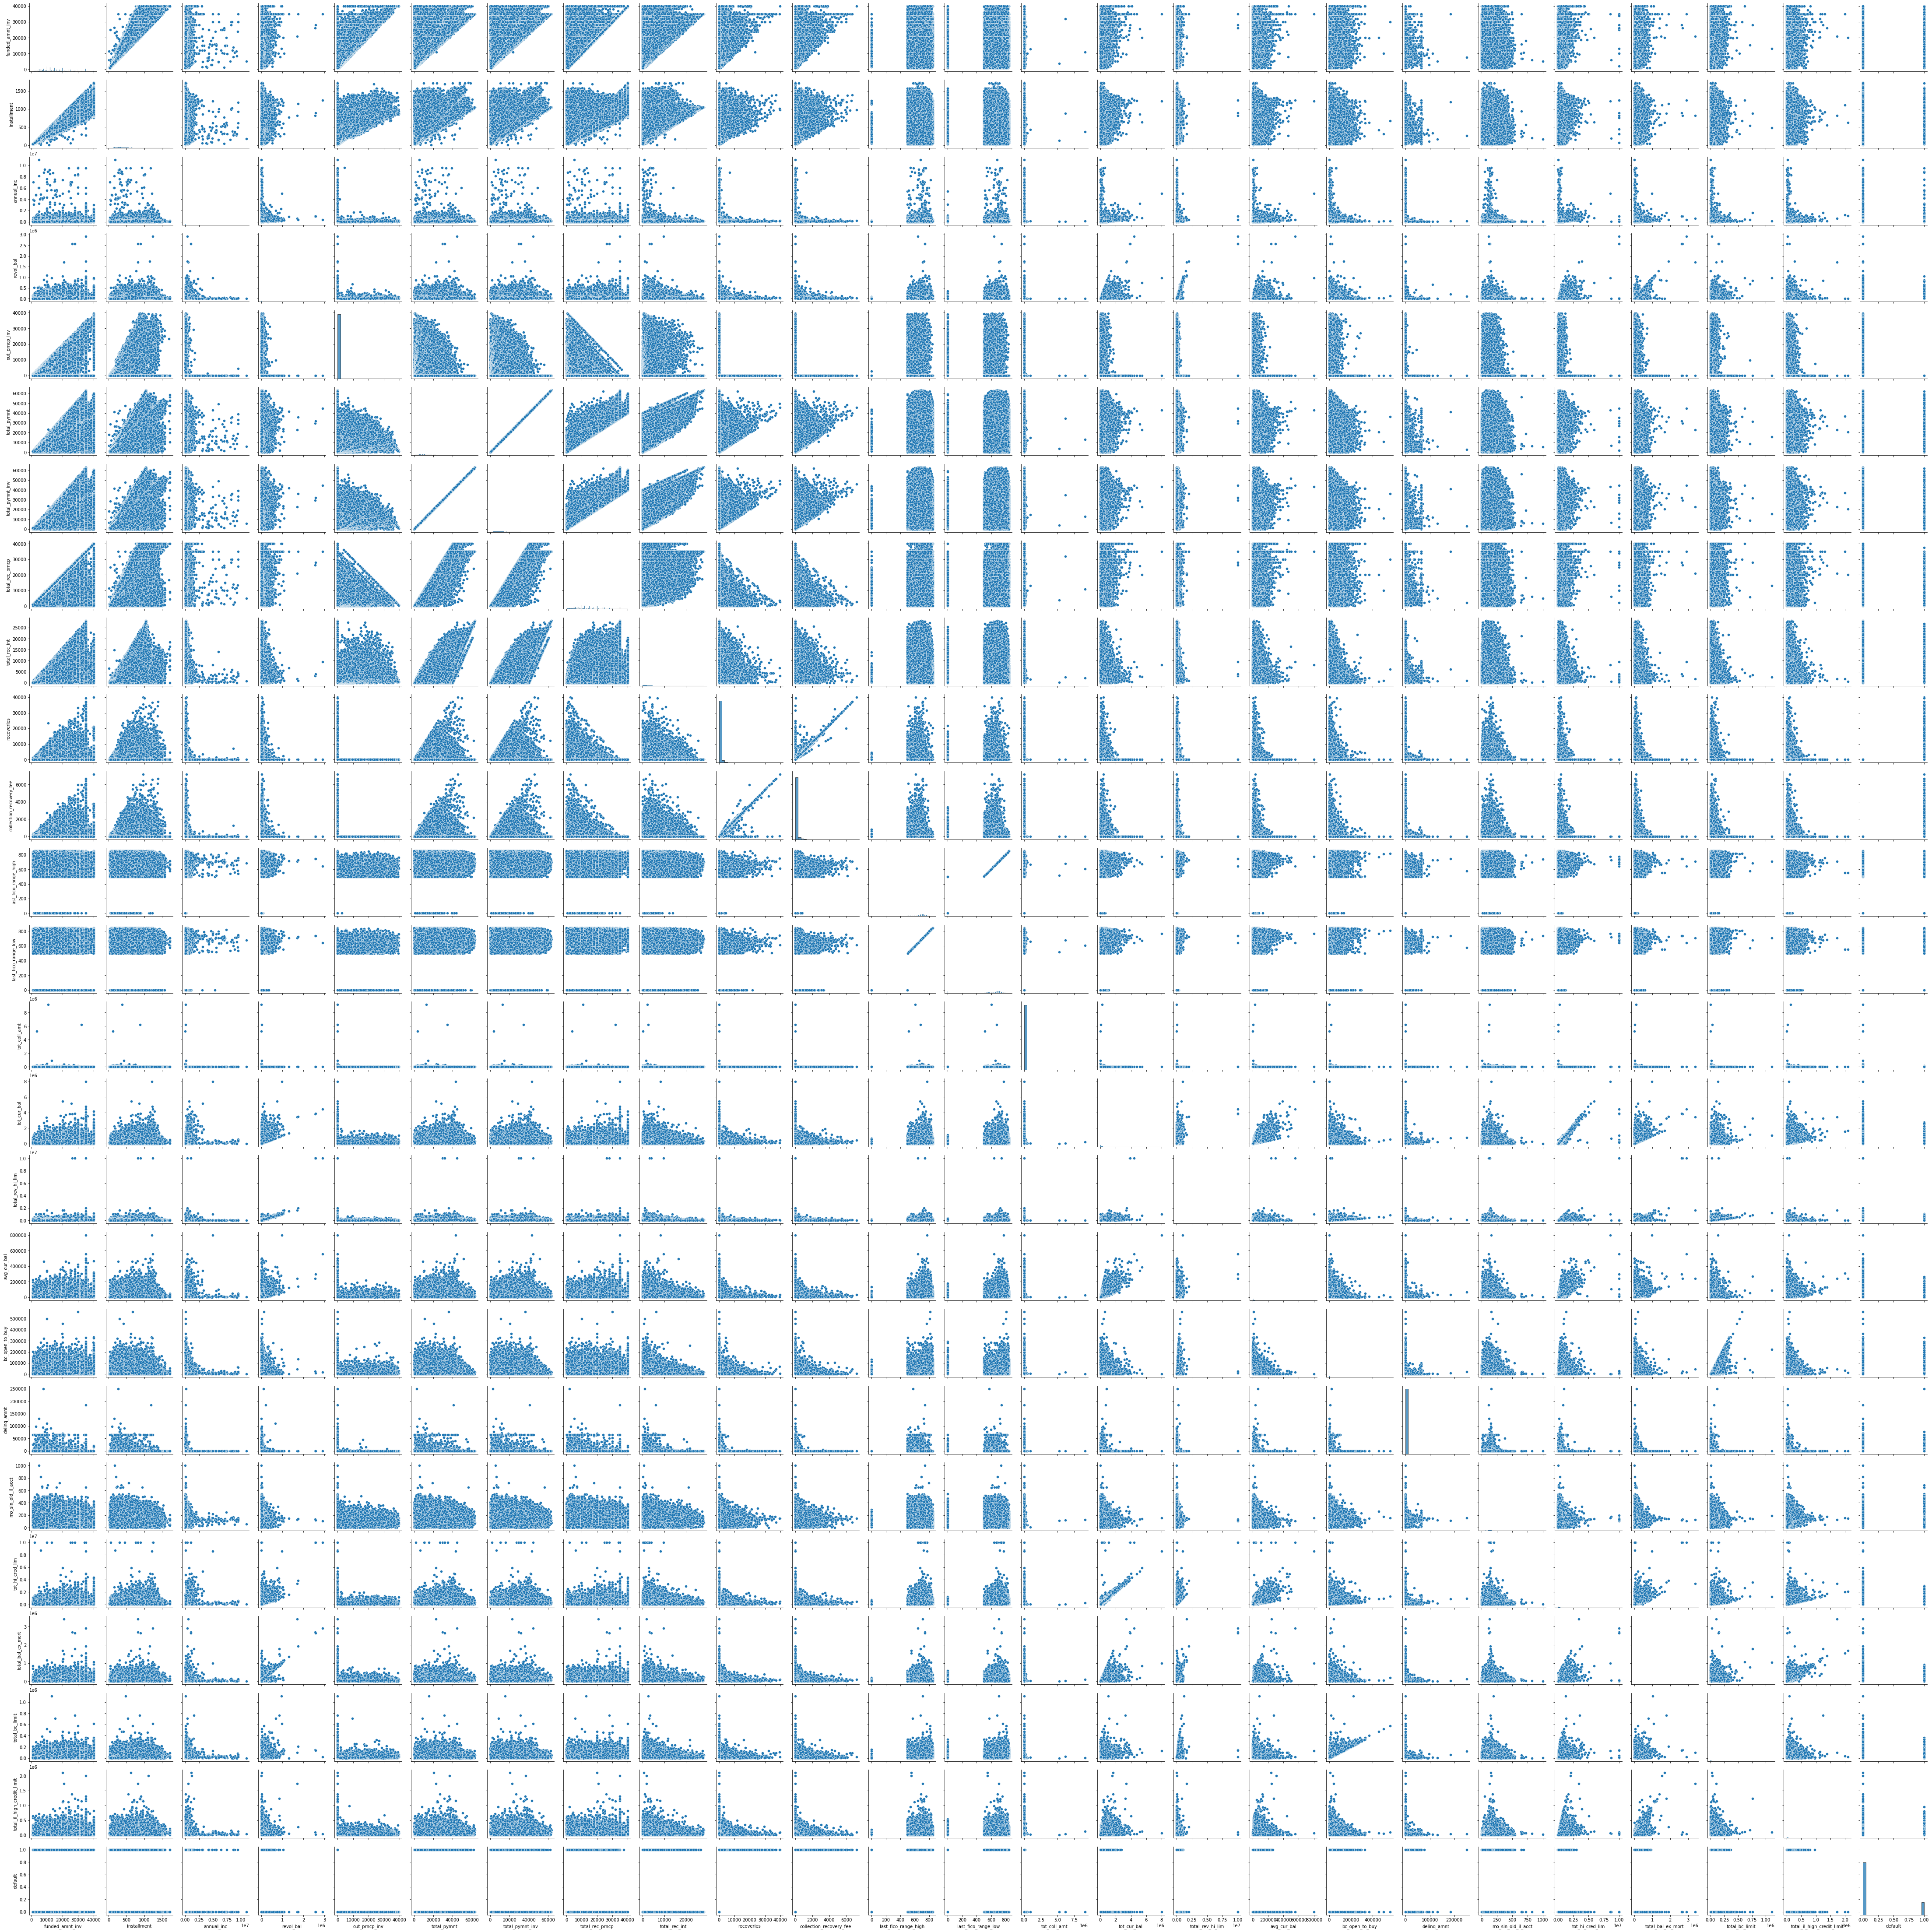

In [23]:
df.corr()
#pairplot
sns.pairplot(df)

Inference-->Most of the columns i have chosen for the modelling follow linear trends and posess very little multicollinearity.

# Uni-Variate Analysis

Checking Distributions and skewness.

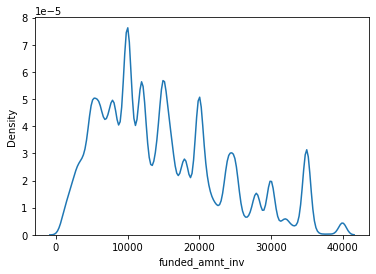

0.7365421619778791 is the skewness of funded_amnt_inv


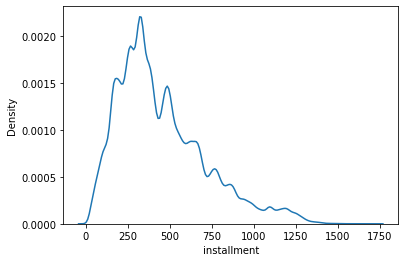

0.973559141480289 is the skewness of installment


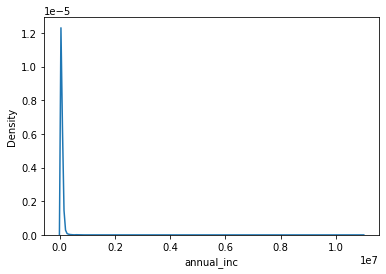

47.85075442170665 is the skewness of annual_inc


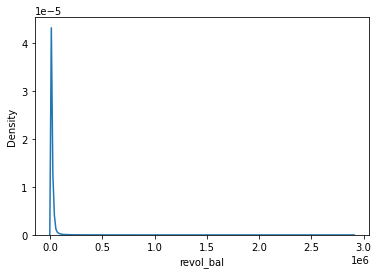

13.542158751493165 is the skewness of revol_bal


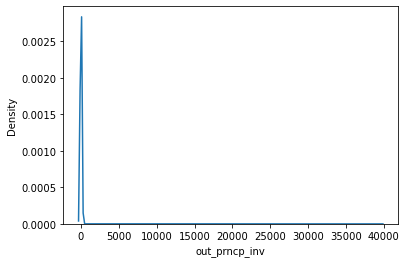

12.228012061859292 is the skewness of out_prncp_inv


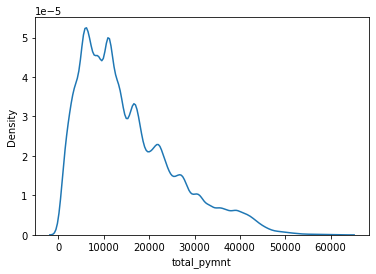

1.0034521658167546 is the skewness of total_pymnt


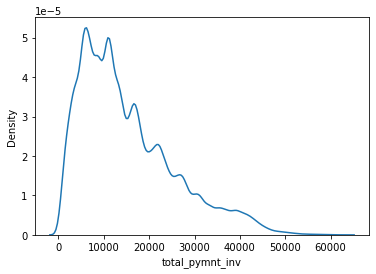

1.0035668106919986 is the skewness of total_pymnt_inv


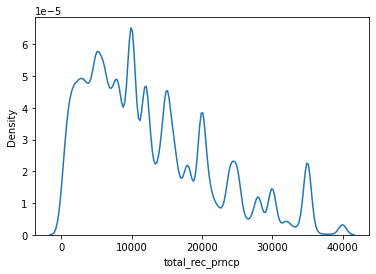

0.8781329380084166 is the skewness of total_rec_prncp


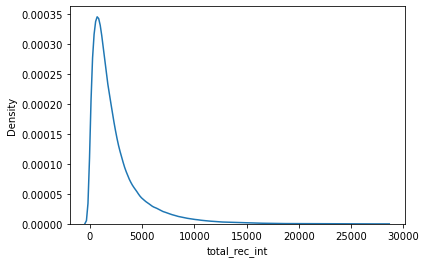

2.571326175383602 is the skewness of total_rec_int


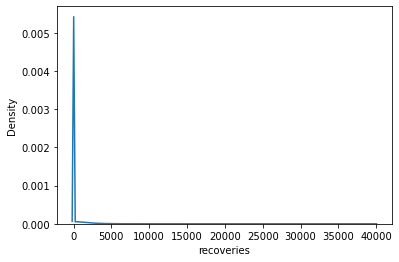

8.007123322728809 is the skewness of recoveries


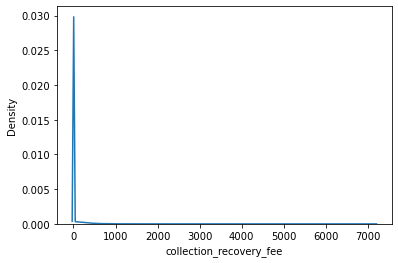

8.31442710662308 is the skewness of collection_recovery_fee


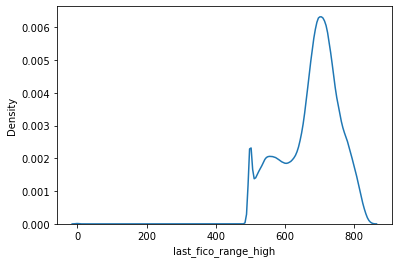

-0.5798447604520565 is the skewness of last_fico_range_high


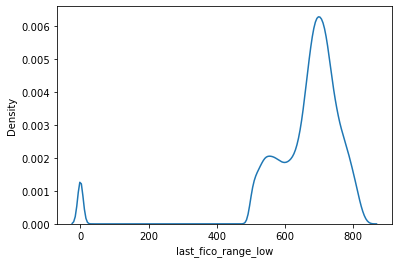

-3.225844984016825 is the skewness of last_fico_range_low


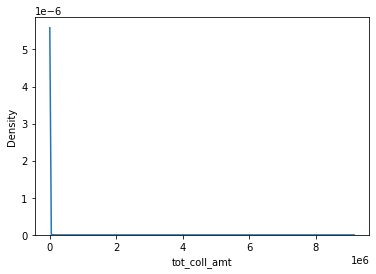

644.3655292590108 is the skewness of tot_coll_amt


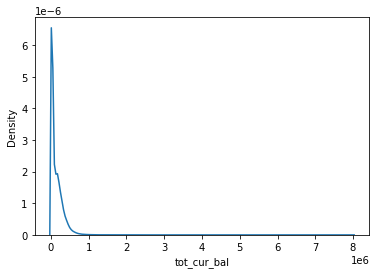

2.866218667724185 is the skewness of tot_cur_bal


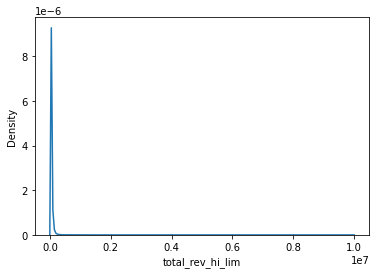

54.578789105634044 is the skewness of total_rev_hi_lim


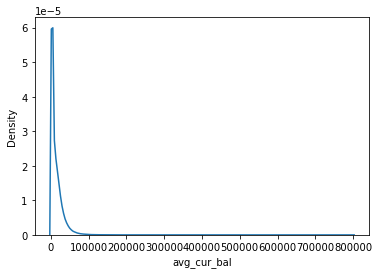

3.6413472217711993 is the skewness of avg_cur_bal


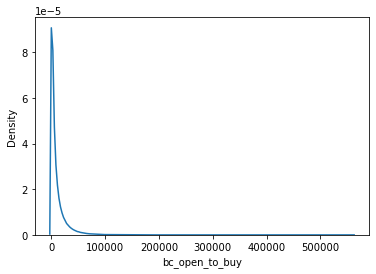

3.8133874032957342 is the skewness of bc_open_to_buy


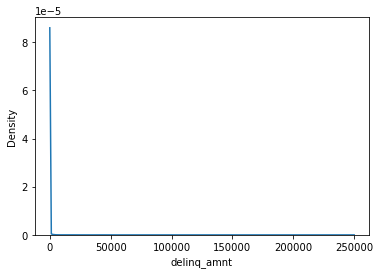

92.9898430872059 is the skewness of delinq_amnt


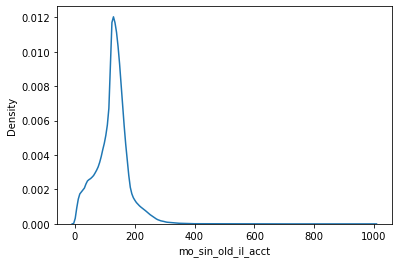

0.3352768855316067 is the skewness of mo_sin_old_il_acct


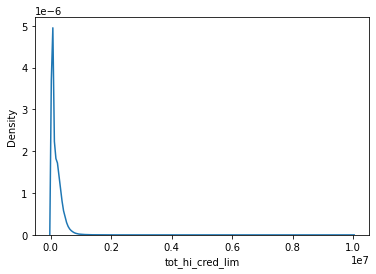

4.031738888367923 is the skewness of tot_hi_cred_lim


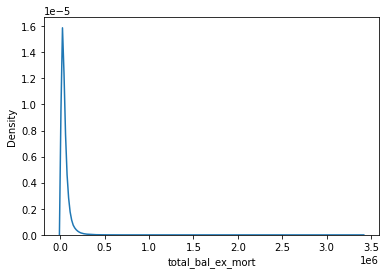

4.3056110773641425 is the skewness of total_bal_ex_mort


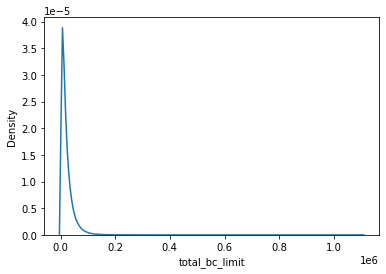

2.8664281786371366 is the skewness of total_bc_limit


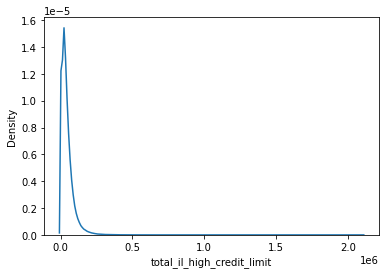

3.1439871904642493 is the skewness of total_il_high_credit_limit


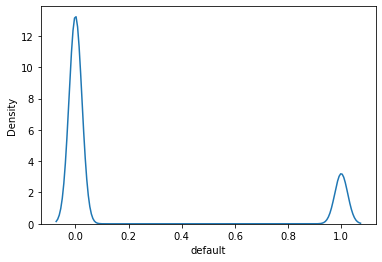

1.5443373576036632 is the skewness of default


In [24]:
for x in df.select_dtypes(np.number).columns:
    sns.kdeplot(df[x])
    plt.show()
    print(df[x].skew(),'is the skewness of',x)
    print('=======================================================================================================================')

Inference-->Since most of the columns are not normally distributed and has outliers suitable transformation is needed to satisify linear regression assumptions.

# Bi-variate analysis of numerical variables with target

In [25]:
def bivariate(col):
    print('The average',col,'for each class of the target')
    df.groupby('default')[col].mean().plot(kind='bar')
    plt.show()
    print(col,'vs default')
    print('===========================================================================================================')

The average funded_amnt_inv for each class of the target


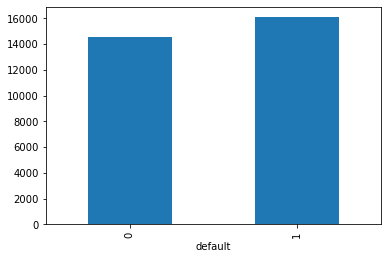

funded_amnt_inv vs default
The average installment for each class of the target


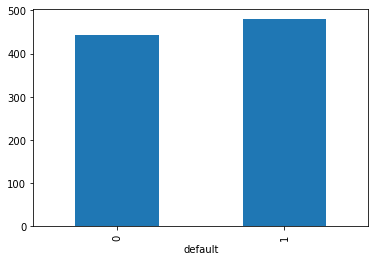

installment vs default
The average annual_inc for each class of the target


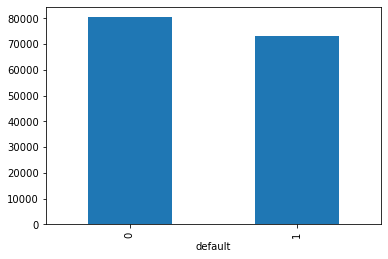

annual_inc vs default
The average revol_bal for each class of the target


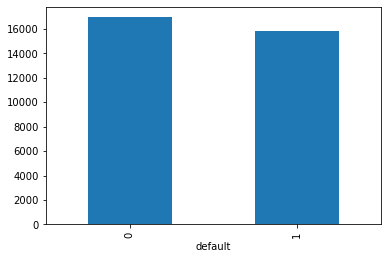

revol_bal vs default
The average out_prncp_inv for each class of the target


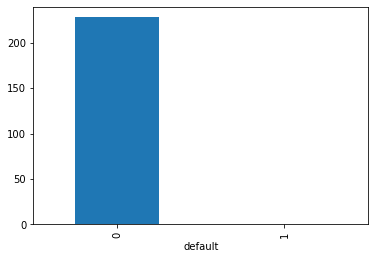

out_prncp_inv vs default
The average total_pymnt for each class of the target


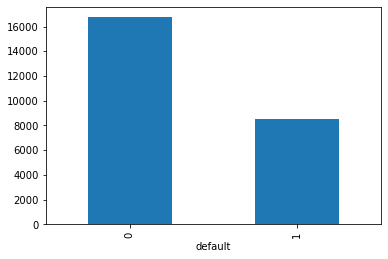

total_pymnt vs default
The average total_pymnt_inv for each class of the target


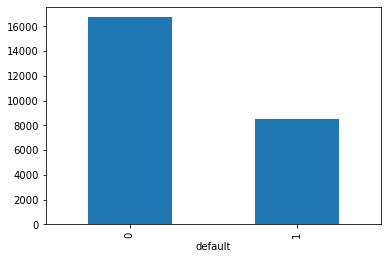

total_pymnt_inv vs default
The average total_rec_prncp for each class of the target


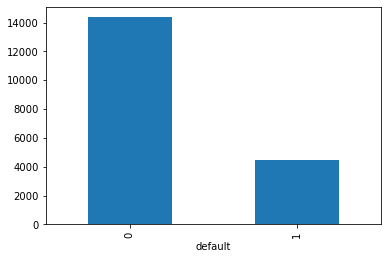

total_rec_prncp vs default
The average total_rec_int for each class of the target


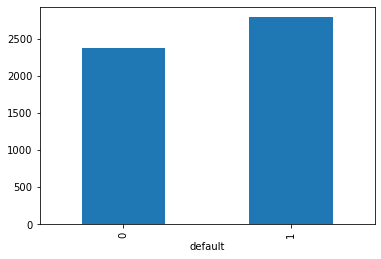

total_rec_int vs default
The average recoveries for each class of the target


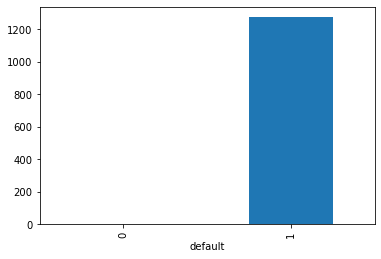

recoveries vs default
The average collection_recovery_fee for each class of the target


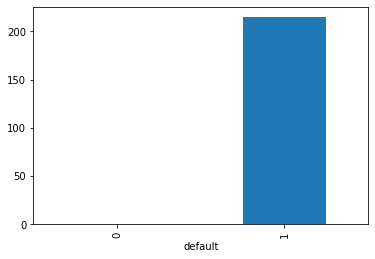

collection_recovery_fee vs default
The average last_fico_range_high for each class of the target


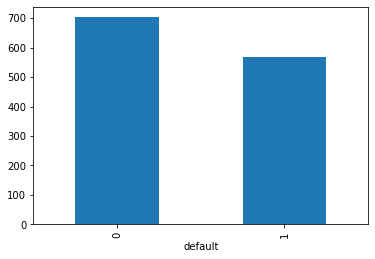

last_fico_range_high vs default
The average last_fico_range_low for each class of the target


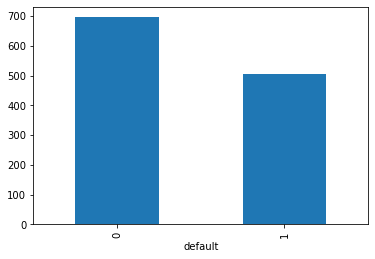

last_fico_range_low vs default
The average tot_coll_amt for each class of the target


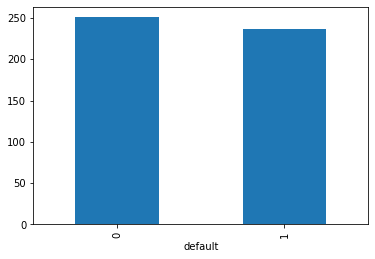

tot_coll_amt vs default
The average tot_cur_bal for each class of the target


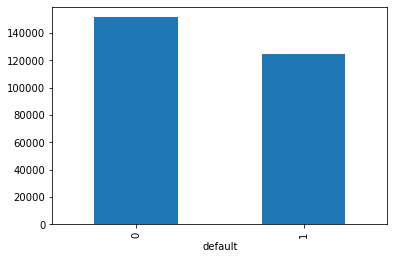

tot_cur_bal vs default
The average total_rev_hi_lim for each class of the target


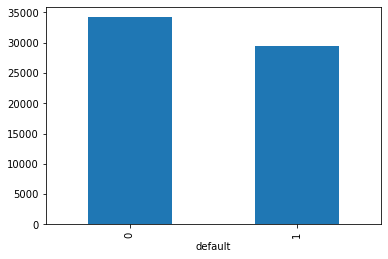

total_rev_hi_lim vs default
The average avg_cur_bal for each class of the target


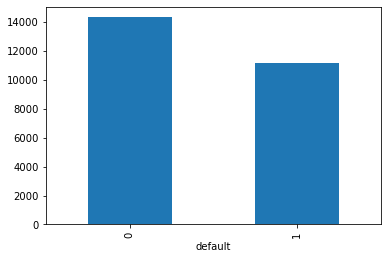

avg_cur_bal vs default
The average bc_open_to_buy for each class of the target


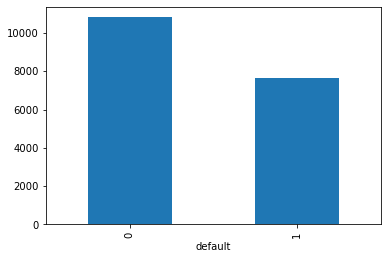

bc_open_to_buy vs default
The average delinq_amnt for each class of the target


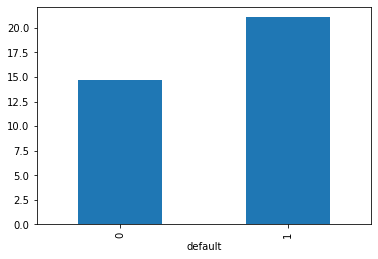

delinq_amnt vs default
The average mo_sin_old_il_acct for each class of the target


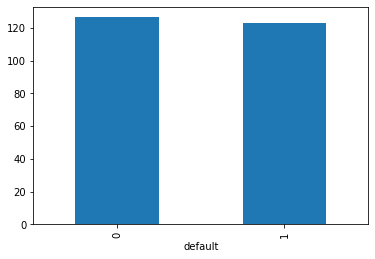

mo_sin_old_il_acct vs default
The average tot_hi_cred_lim for each class of the target


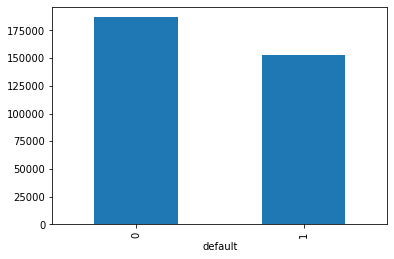

tot_hi_cred_lim vs default
The average total_bal_ex_mort for each class of the target


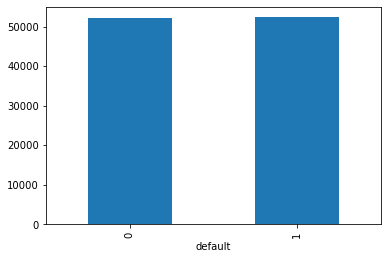

total_bal_ex_mort vs default
The average total_bc_limit for each class of the target


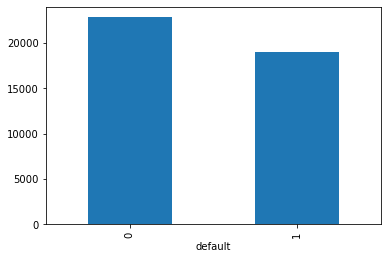

total_bc_limit vs default
The average total_il_high_credit_limit for each class of the target


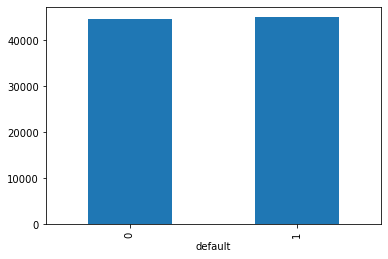

total_il_high_credit_limit vs default
The average default for each class of the target


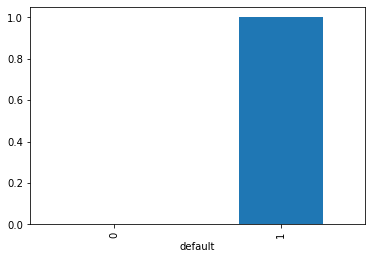

default vs default


In [26]:
for x in df.select_dtypes(np.number):
    bivariate(x)  


In [27]:
dfs=df[df['default']==1]

# Bi-variate analysis of categorical variables with target

Dropping emp title because there are so many number of unique values which do not help in capturing any variance and when we encode, it it will be almost like a discrete data which changes the data definition.

In [28]:
df.drop('emp_title',axis=1,inplace=True)

In [29]:
def bi(col):
    print("Defaulters' rate for",col,'variable')
    (dfs.groupby(col)['default'].count()/df.groupby(col)['default'].count()).sort_values().plot(kind='bar')
    plt.show()
    print('=====================================================================================================================')
    print(col,'vs default')


<ipython-input-30-b24c686236c8>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  for x in df.select_dtypes(np.object).columns:


Defaulters' rate for loan_status variable


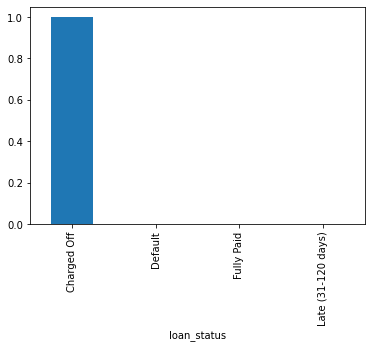

loan_status vs default
Defaulters' rate for sub_grade variable


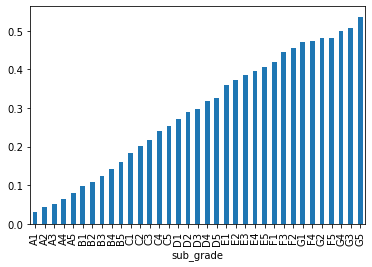

sub_grade vs default
Defaulters' rate for emp_length variable


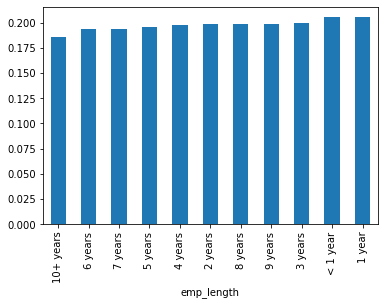

emp_length vs default
Defaulters' rate for home_ownership variable


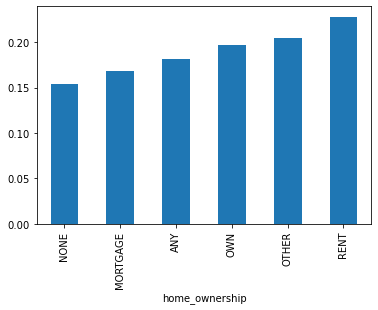

home_ownership vs default
Defaulters' rate for verification_status variable


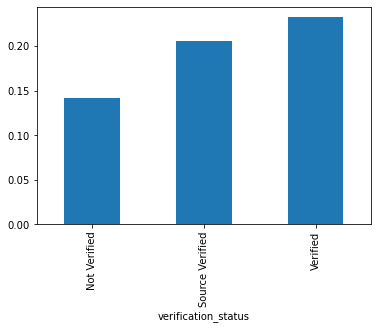

verification_status vs default
Defaulters' rate for initial_list_status variable


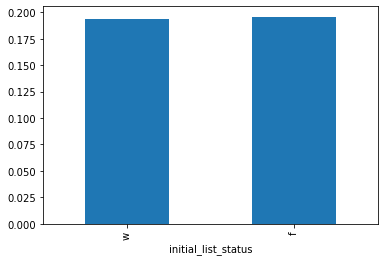

initial_list_status vs default


In [30]:
for x in df.select_dtypes(np.object).columns:
    bi(x)

Splitting Target and checking for imbalance

In [31]:
Y=df['default']
df.drop('default',axis=1,inplace=True)


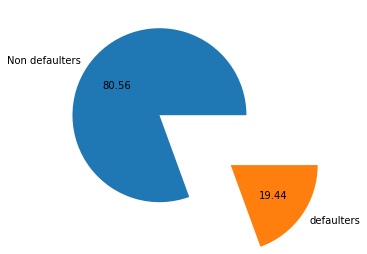

In [32]:
imb=pd.DataFrame(Y.value_counts(1))
plt.pie(imb['default']*100,labels=['Non defaulters','defaulters'],autopct='%.2f',explode=[0,1])
plt.xticks(rotation=45)
plt.show()

Inference--> Class imbalance is not significant so i am not handling the imbalance.

# 4)Data Pre-Processing

# Power Transformation

In [33]:
pt=PowerTransformer()
dfn=df.select_dtypes(np.number).columns
df[dfn]=pt.fit_transform(df[dfn])

-0.045192063714126395


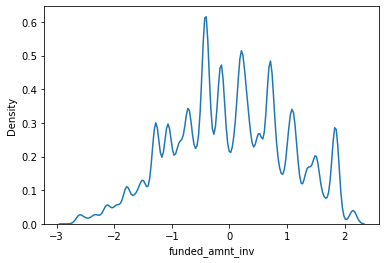

-0.015384648421122655


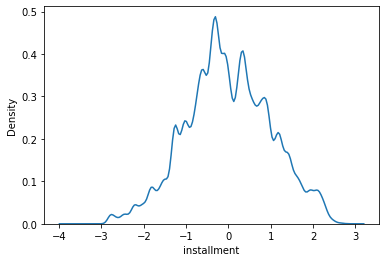

-0.05626063745505995


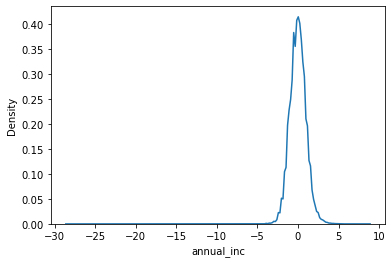

0.18127412124975065


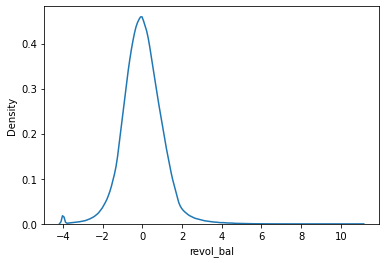

7.7504710052413115


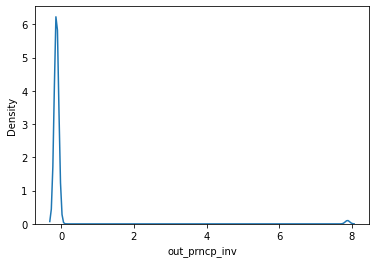

-0.028738840368646983


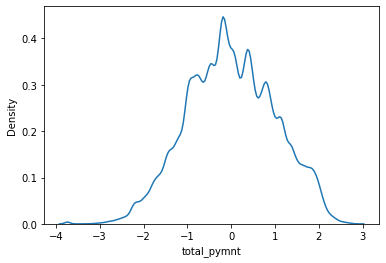

-0.028725090093118657


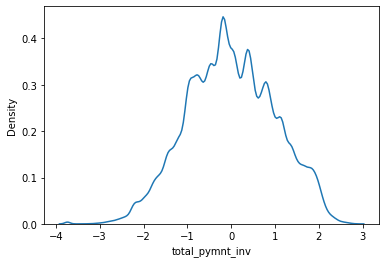

-0.07485798770394803


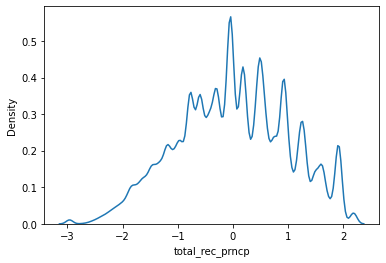

0.03414318125926845


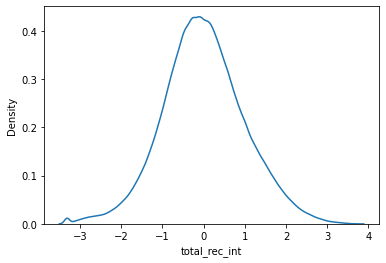

2.178657048074618


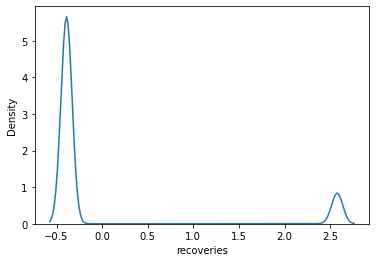

2.2109025675082843


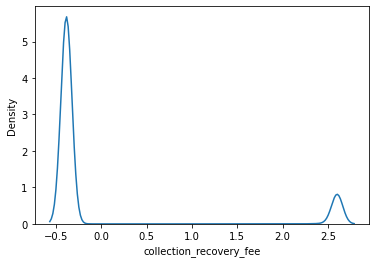

-0.10300733261581208


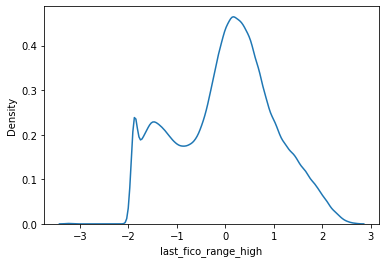

-1.163688555363384


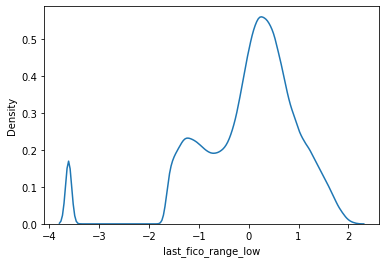

1.9077372032311846


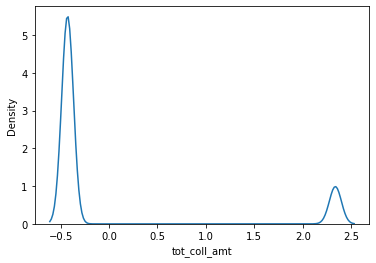

-0.03199891720682959


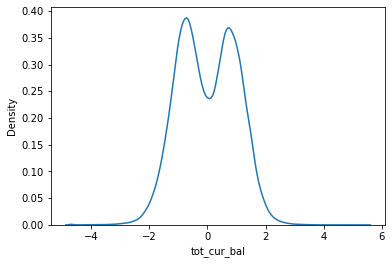

0.011231763447612746


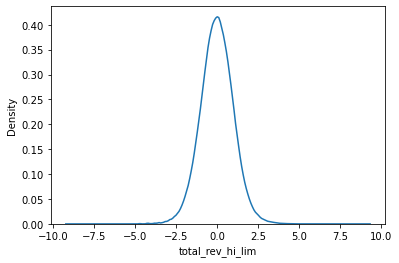

-0.006334625597497307


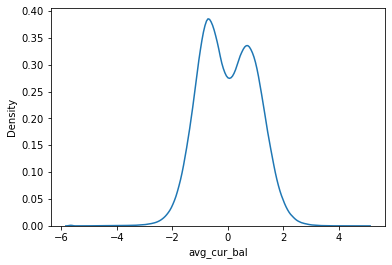

-0.011524959474989426


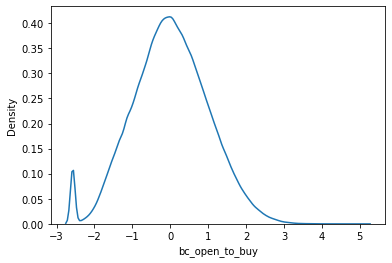

15.689573016957935


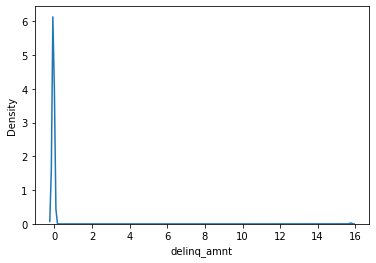

0.0532320391608706


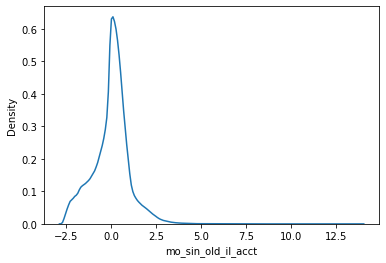

-0.020458508704771432


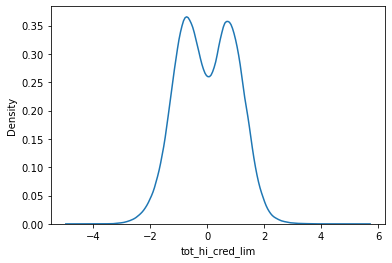

0.0681617996519514


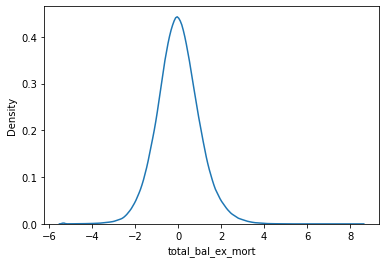

0.015622687594098145


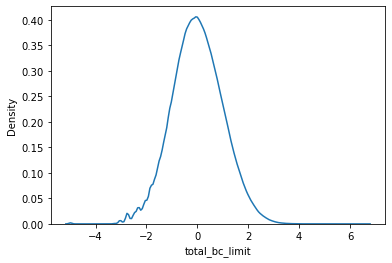

-0.3579621930864514


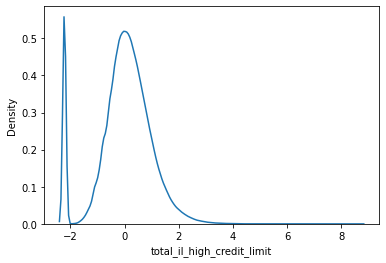

In [34]:
for x in df.select_dtypes(np.number).columns:
    print(df[x].skew())
    sns.kdeplot(df[x])
    plt.show() 

#so the data is almost normally distributed after treatment of outliers using power transformer

# Scaling

In [35]:
ss=StandardScaler()
df[dfn]=ss.fit_transform(df[dfn])

# Dummy Encoding

In [36]:
X=df.select_dtypes(np.number)
X=pd.get_dummies(X,drop_first=True)

# Train-Test Split

In [37]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.75,random_state=0)

# 5)Modelling 

Further dividing test data set, to fit the model to Logit function since the data-set is too large for it iterate through it.


# Implementing Logistic Regression Model.

In [38]:
lr=LogisticRegression()
lr.fit(X_train,Y_train)
ypredlr=lr.predict(X_test)
cm=confusion_matrix(Y_test,ypredlr)
cm

C:\Users\Prajwal Raj R\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[235526,      5],
       [   229,  56690]], dtype=int64)

In [39]:
fpr=cm[0,1]/(cm[1,1]+cm[1,0])
fnr=cm[1,0]/(cm[0,0]+cm[1,0])
print('false positive rate',fpr,'false negative rate',fnr)

false positive rate 8.784412937683374e-05 false negative rate 0.0009713473733324849


# K-fold cross validation for Logistic Regression Model

In [ ]:
cv=cross_val_score(lr,X,Y,verbose=2,n_jobs=5)

In [41]:
be=1-cv.mean()

In [42]:
ve=cv.var()
roc=roc_auc_score(Y_test,ypredlr)

In [43]:
print('Bias Error=',be,'Variance Error',ve,'ROC-AUC_SCORE',roc_auc_score(Y_test,ypredlr))

Bias Error= 0.0009163975216548437 Variance Error 3.722253422544107e-07 ROC-AUC_SCORE 0.9979777551232312



# Implementing Decision Tree

In [44]:
dt=DecisionTreeClassifier(random_state=0)
dt.fit(X_train,Y_train)
ypreddt=dt.predict(X_test)

In [45]:
cm=confusion_matrix(Y_test,ypreddt)

In [46]:
fpr1=cm[0,1]/(cm[1,1]+cm[1,0])
fnr1=cm[1,0]/(cm[0,0]+cm[1,0])
print('false positive rate',fpr1,'false negative rate',fnr1)

false positive rate 0.002371791493174511 false negative rate 0.0005859026722256659


In [47]:
roc1=roc_auc_score(Y_test,ypreddt)

In [48]:
cr=classification_report(Y_test,ypreddt)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    235531
           1       1.00      1.00      1.00     56919

    accuracy                           1.00    292450
   macro avg       1.00      1.00      1.00    292450
weighted avg       1.00      1.00      1.00    292450



# K-fold cross validation for Decision Tree Model

In [49]:
cv=cross_val_score(dt,X,Y,verbose=2,n_jobs=5)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=  19.3s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.4s remaining:    0.0s


[CV] END .................................................... total time=  22.3s
[CV] END .................................................... total time=  20.0s
[CV] END .................................................... total time=  19.5s
[CV] END .................................................... total time=  20.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.7min finished


In [50]:
be1=1-cv.mean()
ve1=cv.std()
roc1=roc_auc_score(Y_test,ypreddt)
print('Bias Error=',be1,'Variance Error',ve1,'ROC-AUC_SCORE',roc_auc_score(Y_test,ypreddt))

Bias Error= 0.001121561904539825 Variance Error 0.0002709820559843615 ROC-AUC_SCORE 0.9985011645355375


# Implementing Random Forest Classifier

In [51]:
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
ypredrf=rf.predict(X_test)

In [52]:
cm=confusion_matrix(Y_test,ypredrf)
cm

array([[235531,      0],
       [   673,  56246]], dtype=int64)

In [53]:
fpr2=cm[0,1]/(cm[1,1]+cm[1,0])
fnr2=cm[1,0]/(cm[0,0]+cm[1,0])
print('false positive rate',fpr2,'false negative rate',fnr2)

false positive rate 0.0 false negative rate 0.002849232019779513


In [54]:
roc_auc_score(Y_test,ypredrf)
cr=classification_report(Y_test,ypredrf)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    235531
           1       1.00      0.99      0.99     56919

    accuracy                           1.00    292450
   macro avg       1.00      0.99      1.00    292450
weighted avg       1.00      1.00      1.00    292450



# K-fold cross validation for Random Forest Classifier

In [58]:
cv=cross_val_score(rf,X,Y,verbose=2,n_jobs=2)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed: 19.5min remaining:    0.0s
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed: 19.5min finished


In [59]:
be2=1-cv.mean()
ve2=cv.std()
roc2=roc_auc_score(Y_test,ypredrf)
print('Bias Error=',be2,'Variance Error',ve2,'ROC-AUC_SCORE',roc_auc_score(Y_test,ypredrf))

Bias Error= 0.002385882981101206 Variance Error 0.0010592422392820223 ROC-AUC_SCORE 0.9940880900929391


# Implementing Ada Boost Classifier.

In [60]:
ab=AdaBoostClassifier(rf)
ab.fit(X_train,Y_train)
ypredab=ab.predict(X_test)

In [61]:
cm=confusion_matrix(Y_test,ypredab)
cm

array([[235531,      0],
       [   459,  56460]], dtype=int64)

In [62]:
fpr3=cm[0,1]/(cm[1,1]+cm[1,0])
fnr3=cm[1,0]/(cm[0,0]+cm[1,0])
print('false positive rate',fpr3,'false negative rate',fnr3)

false positive rate 0.0 false negative rate 0.0019449976693927708


In [63]:
cr=classification_report(Y_test,ypredab)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    235531
           1       1.00      0.99      1.00     56919

    accuracy                           1.00    292450
   macro avg       1.00      1.00      1.00    292450
weighted avg       1.00      1.00      1.00    292450



# K-fold cross validation for Ada boost classifier

In [64]:
cv=cross_val_score(ab,X,Y,verbose=2,n_jobs=2)
be3=1-cv.mean()
ve3=cv.std()
roc3=roc_auc_score(Y_test,ypredab)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed: 32.9min remaining:    0.0s
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed: 32.9min finished


In [65]:
print('Bias Error=',be3,'Variance Error',ve3,'ROC-AUC_SCORE',roc_auc_score(Y_test,ypredab))

Bias Error= 0.001982393491765655 Variance Error 0.0011500503803276768 ROC-AUC_SCORE 0.9959679544616034


# 6)Evaluation

In [66]:
models=['Logistic Regression','Decision Tree','Random Forest','Ada Boost']
roc_aucs=[roc,roc1,roc2,roc3]
bias_errors=[be,be1,be2,be3]
variance_errors=[ve,ve1,ve2,ve3]
fprs=[fpr,fpr1,fpr2,fpr3]
fnrs=[fnr,fnr1,fnr2,fnr3]

In [68]:
mdf=pd.DataFrame()
mdf[models[0]]=np.array([roc,be,ve,fpr,fnr])*100
mdf[models[1]]=np.array([roc1,be1,ve1,fpr1,fnr1])*100
mdf[models[2]]=np.array([roc2,be2,ve2,fpr2,fnr2])*100
mdf[models[3]]=np.array([roc3,be3,ve3,fpr3,fnr3])*100

In [71]:
mdf

Logistic Regression  Decision Tree  Random Forest  Ada Boost
0            99.797776      99.850116      99.408809  99.596795
1             0.091640       0.112156       0.238588   0.198239
2             0.000037       0.027098       0.105924   0.115005
3             0.008784       0.237179       0.000000   0.000000
4             0.097135       0.058590       0.284923   0.194500

# Model Insights

I have tried to fit the Logisitic Regression, Decision Tree, Random Forest and Ada boost models to the data set, Almost every model has a good fit with the data set with bias error of less than 0.2%. Here i have considered both false positive rate and false negativerate as a metric to choose the best model since they both are very crucial for the above concerned problem. The Data-points in the false negatives are those customers who are more likely to default the loan but the model has classified them under non-defaulters' class, so in this case the company is likely to loose the capital money thus it becomes a non profittable asset to the company and the company has to be liable to the peer who has lent the money and in the other case i.e false positives, the data points in this cell of confusion matrix are those customers who are likely to pay the loan on time but the model has classified them under defaulters' class, so in this case company looses business which is an unfavourable situation to them. Logistic regression model gives an roc_auc_score of 99.79% and least variance error, false positive rate and false negative rate as compared to other models which is the reason why Logistic Regression will be my final selected model.